#  Exploratory Data Analysis ENEM 2019

# 1) Loading Data

ENEM in loose translation means National Exam of High School. It is the principal way to enter a university in all Brazilian territory. This analysis is meant to discover if ethnicity, household income, age, type of school (private or public), access to internet and other aspects can be related to the final grade of the students

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_enem = pd.read_csv("data/enem_summarized.csv")

In [3]:
df_enem = df_enem.drop(columns=['Unnamed: 0'])
df_enem.head()

,id,geographic_state,age,gender,ethnicity,biology_grade,history_grade,portuguese_grade,tech_grade,math_grade,school_type,mothers_schooling,internet_access,household_income,presence_day1,presence_day2
0,190001595656,NaN,13,M,3,NaN,NaN,NaN,NaN,NaN,1,B,B,A,0,0
1,190001421546,NaN,8,M,1,NaN,NaN,NaN,NaN,NaN,1,E,B,C,0,0
2,190001133210,NaN,13,F,3,NaN,NaN,NaN,NaN,NaN,1,E,B,B,0,0
3,190001199383,NaN,10,F,1,483.8,503.6,537.3,392.0,460.0,1,E,B,E,1,1
4,190001237802,NaN,7,F,1,513.6,575.5,570.7,677.0,860.0,1,E,B,G,1,1


# 2) Data Type

Knowing the nature of the variables

In [4]:
print('DATASET SHAPE: ', df_enem.shape, '\n')
print('-'*50)
print('FEATURE DATA TYPES: ')
print(df_enem.info())

DATASET SHAPE:  (5095171, 16) 

--------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095171 entries, 0 to 5095170
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   geographic_state   object 
 2   age                int64  
 3   gender             object 
 4   ethnicity          int64  
 5   biology_grade      float64
 6   history_grade      float64
 7   portuguese_grade   float64
 8   tech_grade         float64
 9   math_grade         float64
 10  school_type        int64  
 11  mothers_schooling  object 
 12  internet_access    object 
 13  household_income   object 
 14  presence_day1      int64  
 15  presence_day2      int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 622.0+ MB
None


In [5]:
print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
print(df_enem.nunique())

NUMBER OF UNIQUE VALUES PER FEATURE: 

id                   5095171
geographic_state          27
age                       20
gender                     2
ethnicity                  6
biology_grade           4688
history_grade           4684
portuguese_grade        4124
tech_grade              6011
math_grade                50
school_type                3
mothers_schooling          8
internet_access            2
household_income          17
presence_day1              3
presence_day2              3
dtype: int64


In [6]:
print('NULL VALUES PER FEATURE')
print(df_enem.isnull().sum())

NULL VALUES PER FEATURE
id                         0
geographic_state     3947784
age                        0
gender                     0
ethnicity                  0
biology_grade        1384836
history_grade        1172125
portuguese_grade     1172125
tech_grade           1384836
math_grade           1172126
school_type                0
mothers_schooling          0
internet_access            0
household_income           0
presence_day1              0
presence_day2              0
dtype: int64


In [7]:
registration = len(df_enem['id'])
print ('ENEM has received '+ str(registration) +' registrations')

ENEM has received 5095171 registrations


Assigning labels to variables

In [8]:
#Ethnicity
df_enem['ethnicity'] = df_enem['ethnicity'].map({0:'NA', 6:'NA', 1:'White', 2:'Black', 3:'Brown',4:'Yellow', 5:'Indigenous'})

#Access to internet
df_enem['internet_access'] = df_enem['internet_access'].map({'A':'No', 'B':'Yes'})

#Mother's schooling
df_enem['mothers_schooling'] = df_enem['mothers_schooling'].map({'A':'Never studied', 'B':'Did not complete elementary school', 'C':'Did not complete elementary school',
                                'D':'Did not complete high school', 'E':'Did not complete college', 'F':'graduated',
                                'G':'Post graduate','H':'Dont know'})

#Familiar income
df_enem['household_income'] = df_enem['household_income'].map({'A':'None', 'B':'Until 1.320', 'C':'Until 1.320',
                                 'D':'Until 3.520', 'E':'Until 3.520', 'F':'Until 3.520', 'G':'Until 3.520',
                                 'H':'Until 10.560','I':'Until 10.560', 'J':'Until 10.560','K':'Until 10.560',
                                 'L':'Until 10.560','M':'Until 10.560','N':'Until 10.560',
                                 'O':'More than 10.560','P':'More than 10.560','Q':'More than 10.560'})

#Type of school
df_enem['school_type'] = df_enem['school_type'].map({1:'Do not answer', 2:'Public', 3:'Private', 4:'Abroad'})

#Presence in Human Science test
df_enem['presence_day1'] = df_enem['presence_day1'].map({0:'Did not attend the test', 1:'Attend the test', 2:'Eliminated'})

#Presence in Math test
df_enem['presence_day2'] = df_enem['presence_day2'].map({0:'Did not attend the test', 1:'Attend the test', 2:'Eliminated'})

df_enem['age'] = df_enem['age'].map({1:'a) younger than 17', 
                                     2:'b) 17', 
                                     3:'c) 18',
                                     4:	'd) 19',
                                    5:	'e) 20',
                                    6:	'f) 21',
                                    7:	'g) 22',
                                    8:	'h) 23',
                                    9:	'i) 24',
                                    10:	'j) 25',
                                    11:	'k) between 26 and 30',
                                    12:	'l) between 31 and 35',
                                    13: 'm) between 36 and 40',
                                    14:	'n) between 41 and 45',
                                    15:	'o) between 46 and 50',
                                    16:	'p) between 51 and 55',
                                    17:	'q) between 56 and 60',
                                    18:	'r) between 61 and 65',
                                    19:	's) between 66 and 70',
                                    20: 't) older than 70'})

# 3) Removing candidates that do not attend to the test

In [9]:
print('Percentage of students present on the first day of ENEM')
print(round(df_enem['presence_day1'].value_counts(normalize=True)*100,2))
print('\n', 'Percentage of students present on the second day of ENEM')
print(round(df_enem['presence_day2'].value_counts(normalize=True)*100,2))

Percentage of students present on the first day of ENEM
Attend the test            77.00
Did not attend the test    22.92
Eliminated                  0.08
Name: presence_day1, dtype: float64

 Percentage of students present on the second day of ENEM
Attend the test            72.82
Did not attend the test    27.14
Eliminated                  0.04
Name: presence_day2, dtype: float64


If you do not attend to one of the test day, the candidate is eliminated. For this reason, we will remove those people from the data set

In [10]:
print("In total "+
str(len(df_enem[(df_enem['presence_day1'] == 'Did not attend the test') | 
        (df_enem['presence_day1'] == 'eliminated') | 
        (df_enem['presence_day2'] == 'Did not attend the test') | 
        (df_enem['presence_day2'] == 'eliminated')]))+ 
    " people were absent or get eliminated, that represent " +
    str(round(len(df_enem[(df_enem['presence_day1'] == 'Did not attend the test') | 
        (df_enem['presence_day1'] == 'eliminated') | 
        (df_enem['presence_day2'] == 'Did not attend the test') | 
        (df_enem['presence_day2'] == 'eliminated')])*100/len(df_enem['id']),2))
    + "% of the total cadidates registered")


In total 1390967 people were absent or get eliminated, that represent 27.3% of the total cadidates registered


In [11]:
df_enem.drop(index=df_enem[(df_enem['presence_day1'] == 'Did not attend the test') | 
                           (df_enem['presence_day1'] == 'eliminated') | 
                           (df_enem['presence_day2'] == 'Did not attend the test') | 
                           (df_enem['presence_day2'] == 'eliminated')].index, 
             inplace=True)


In [12]:
print('NULL VALUES PER FEATURE')
print(df_enem.isnull().sum())

NULL VALUES PER FEATURE
id                         0
geographic_state     2749761
age                        0
gender                     0
ethnicity                  0
biology_grade           1896
history_grade            402
portuguese_grade         402
tech_grade              1896
math_grade               403
school_type                0
mothers_schooling          0
internet_access            0
household_income           0
presence_day1              0
presence_day2              0
dtype: int64


The number of null values reduced considerably, but to not influence the analysis, I will remove all the null values related to the grade of the students

In [13]:
df_enem.dropna(subset=['biology_grade', 'history_grade', 'portuguese_grade', 'tech_grade', 'math_grade'], inplace=True)

# 4) Univariate analysis

In [14]:
def categorical_analysis (data):
    aux = data.value_counts(normalize=False).sort_values(ascending=False)
    sns.barplot(x=aux.index, y=aux.values)
    plt.show()
    print(round(data.value_counts(normalize=True).sort_values(ascending=False)*100,2))

## 4.1) Gender

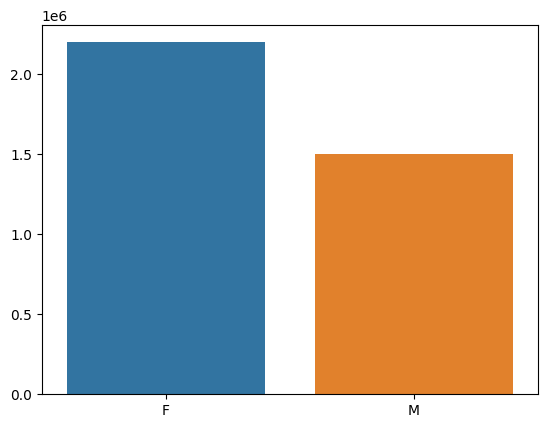

F    59.46
M    40.54
Name: gender, dtype: float64


In [15]:
categorical_analysis(df_enem['gender'])

## 4.2) State

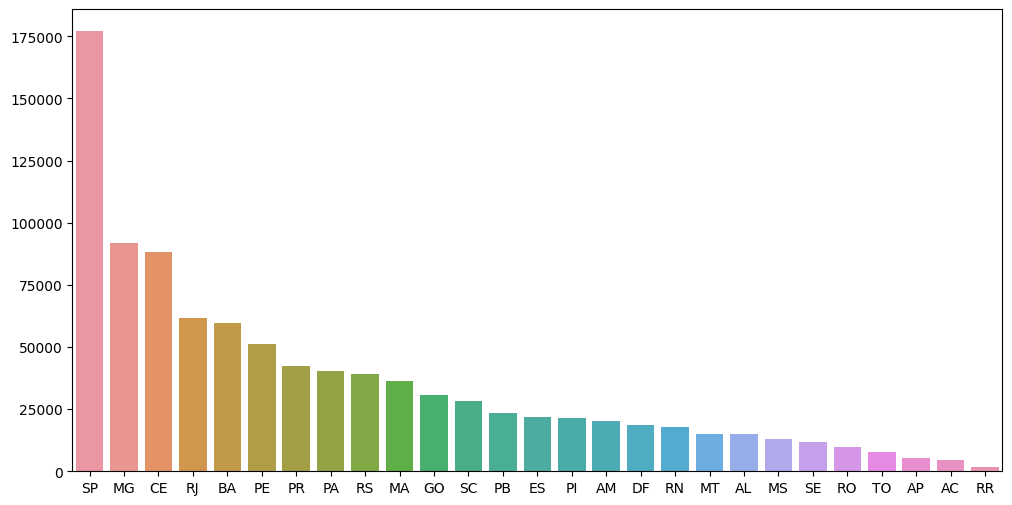

SP    18.56
MG     9.63
CE     9.26
RJ     6.48
BA     6.24
PE     5.37
PR     4.45
PA     4.22
RS     4.09
MA     3.82
GO     3.20
SC     2.96
PB     2.46
ES     2.28
PI     2.23
AM     2.11
DF     1.96
RN     1.88
MT     1.57
AL     1.56
MS     1.38
SE     1.23
RO     1.02
TO     0.81
AP     0.55
AC     0.48
RR     0.18
Name: geographic_state, dtype: float64


In [16]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['geographic_state'])

## 4.3) Ethnicity

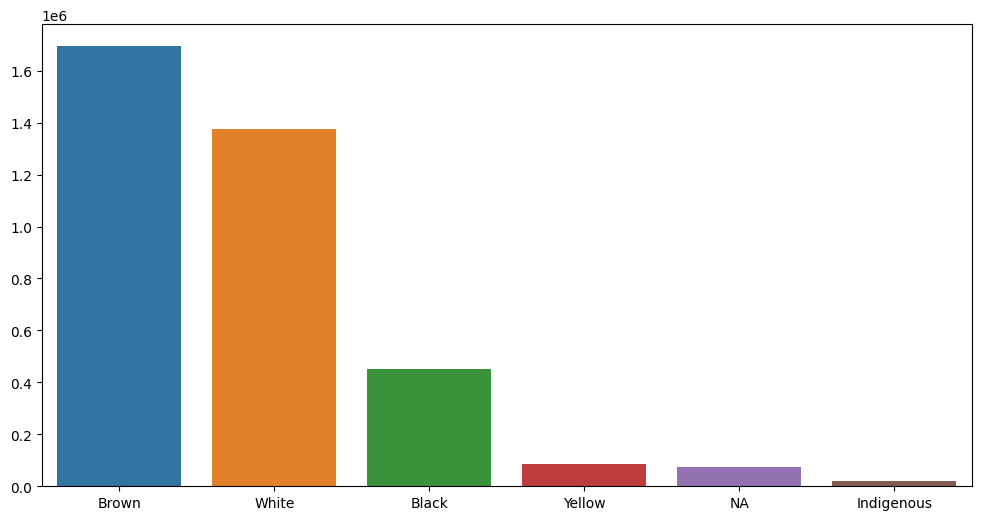

Brown         45.76
White         37.14
Black         12.24
Yellow         2.29
NA             1.98
Indigenous     0.58
Name: ethnicity, dtype: float64


In [17]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['ethnicity'])

## 4.4) Age

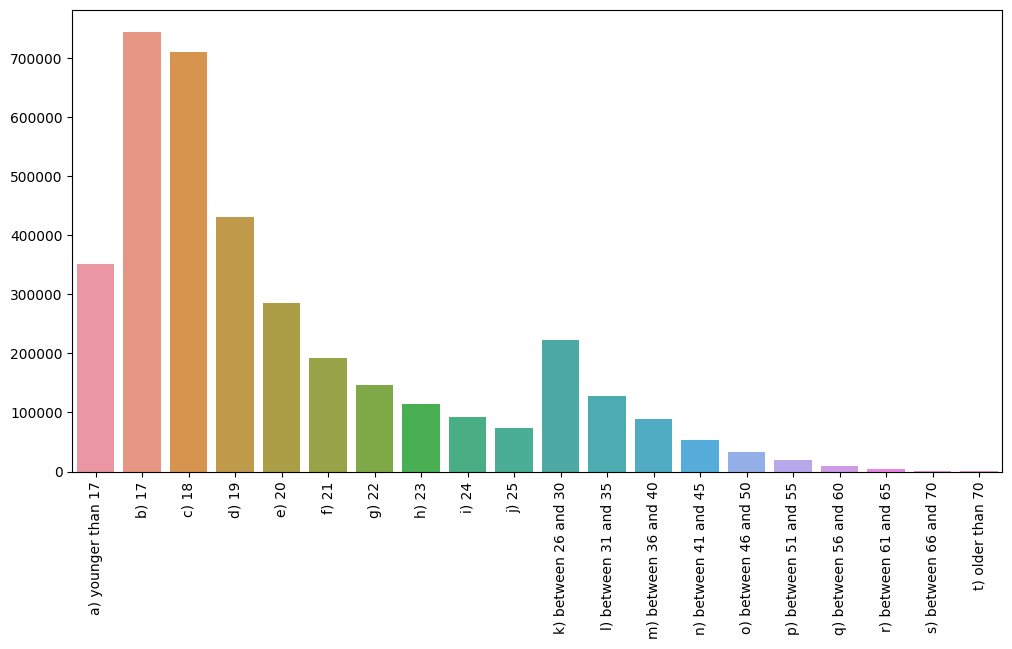

In [18]:
plt.figure( figsize=(12, 6))
plt.xticks(rotation=90)
aux = df_enem['age'].value_counts(normalize=False).sort_index(ascending=True)
sns.barplot(x=aux.index, y=aux.values)
plt.show()

## 4.5) School Type

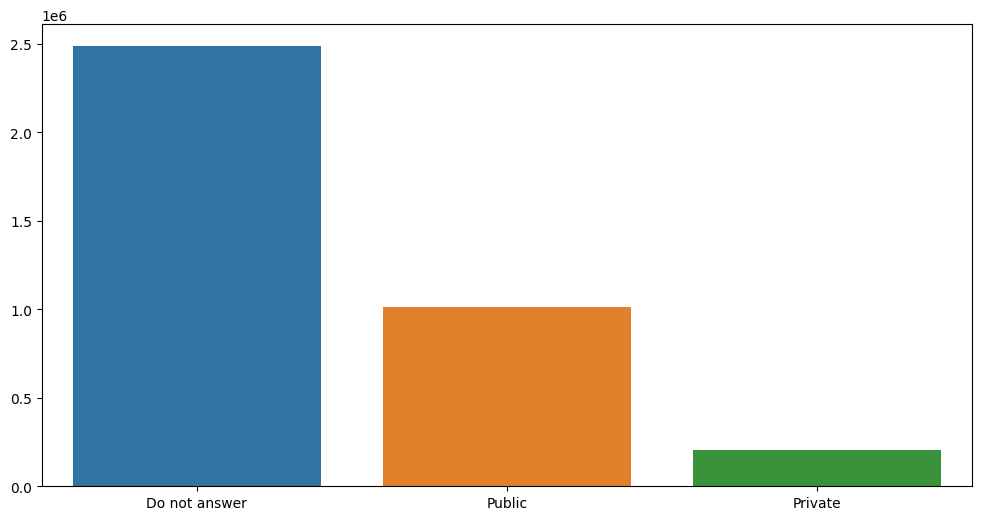

Do not answer    67.12
Public           27.28
Private           5.60
Name: school_type, dtype: float64


In [19]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['school_type'])

## 4.6) Internet Access

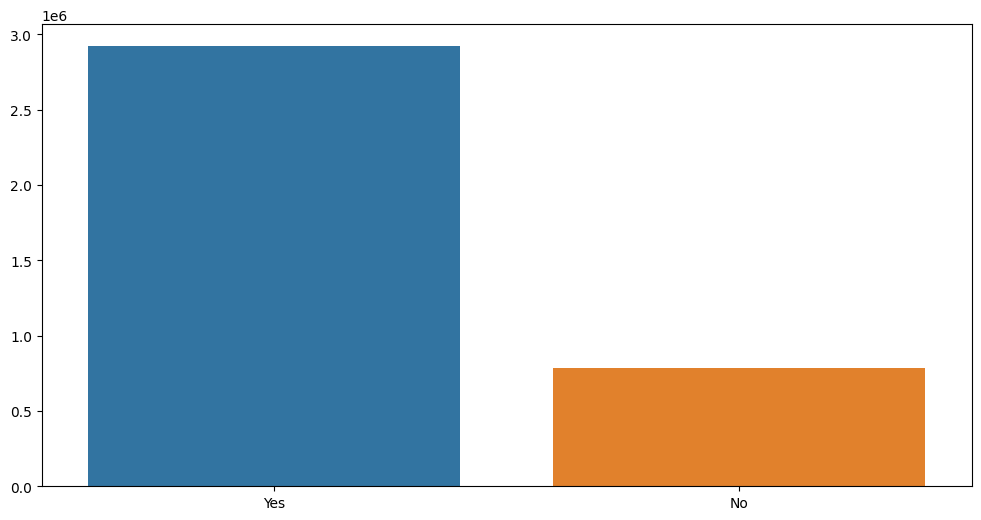

Yes    78.88
No     21.12
Name: internet_access, dtype: float64


In [20]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['internet_access'])

## 4.7) Mother's schooling

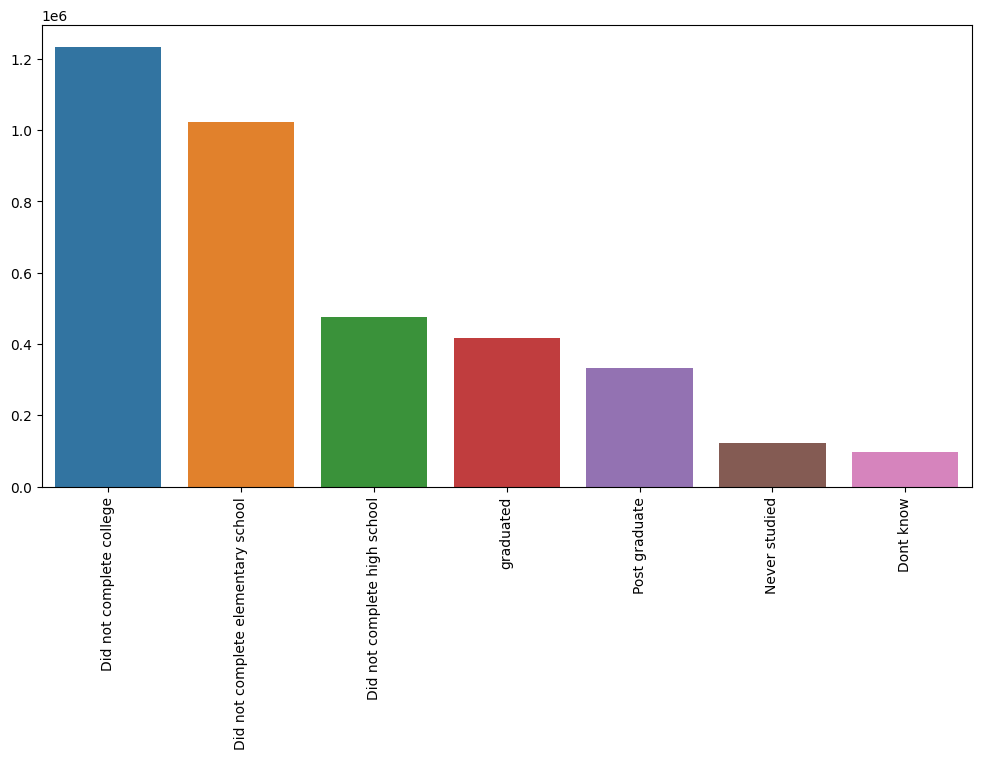

Did not complete college              33.35
Did not complete elementary school    27.64
Did not complete high school          12.85
graduated                             11.24
Post graduate                          9.00
Never studied                          3.27
Dont know                              2.64
Name: mothers_schooling, dtype: float64


In [21]:
plt.figure( figsize=(12, 6))
plt.xticks(rotation=90)
categorical_analysis(df_enem['mothers_schooling'])

## 4.8) Household Income

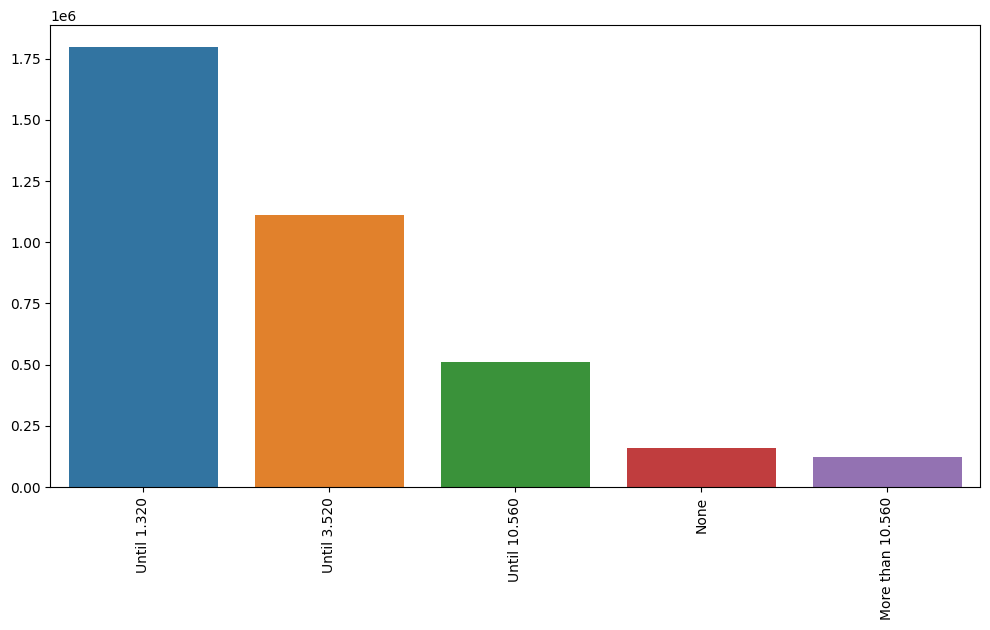

Until 1.320         48.55
Until 3.520         29.97
Until 10.560        13.85
None                 4.27
More than 10.560     3.37
Name: household_income, dtype: float64


In [22]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
categorical_analysis(df_enem['household_income'])

## 4.9) The Grades

<Axes: xlabel='math_grade', ylabel='Count'>

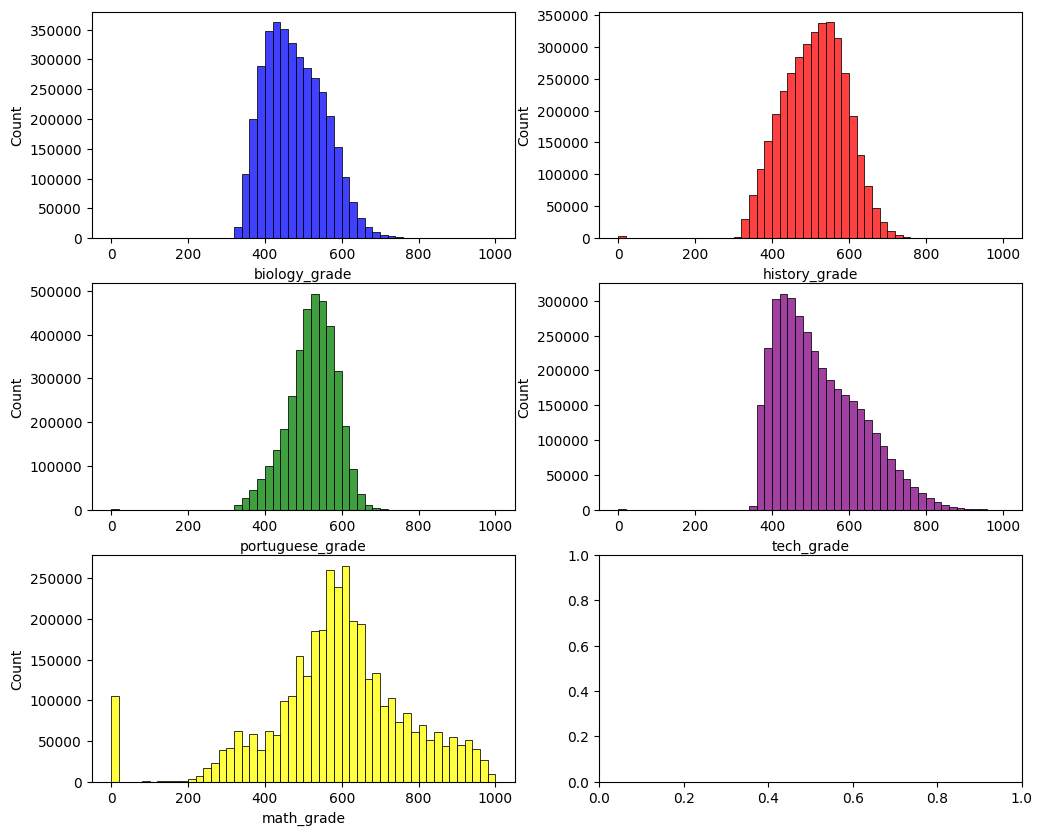

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.histplot(df_enem['biology_grade'], bins=50,binrange = (0,1000),  ax=axes[0,0], color="blue")
sns.histplot(df_enem['history_grade'], bins=50,binrange = (0,1000),  ax=axes[0,1], color="red")
sns.histplot(df_enem['portuguese_grade'], bins=50,binrange = (0,1000),  ax=axes[1,0], color="green")
sns.histplot(df_enem['tech_grade'], bins=50,binrange = (0,1000),  ax=axes[1,1], color="purple")
sns.histplot(df_enem['math_grade'], bins=50,binrange = (0,1000),  ax=axes[2,0], color="yellow")


# 5) Bivariate Analysis

In [24]:
def qualitative_analysis(X, Y, data):
    plt.figure( figsize=(12, 6))
    sns.countplot(x=X, hue=Y, data=data)
    plt.show
    

In [25]:
def statistics (col1, col2, df):
    sns.boxplot(x=col1, y=col2, data=df)

    x_mean = df[[col1, col2]].groupby([col1]).mean().reset_index().sort_values(by = [col1])
    x_count = df[[col1, col2]].groupby([col1]).count().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_median = df[[col1, col2]].groupby([col1]).median().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_std = df[[col1, col2]].groupby([col1]).std().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_min = df[[col1, col2]].groupby([col1]).min().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_max = df[[col1, col2]].groupby([col1]).max().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_sum = df[[col1, col2]].groupby([col1]).sum().reset_index().sort_values(by = [col1]).iloc[:,1]
    
    x_stats = pd.concat( [x_mean, x_median, x_std, x_min, x_max, x_sum, x_count], axis = 1)
    x_stats.columns = [col1,'mean', 'median', 'std', 'min', 'max', 'sum', 'count']
    return x_stats

## 5.1) Acess to Internet and Ehtnicity

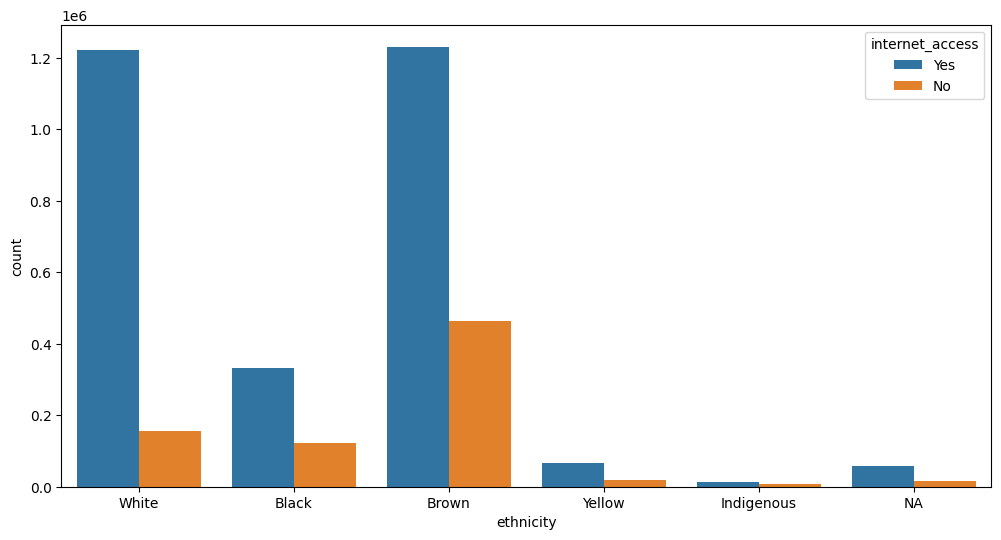

In [26]:
qualitative_analysis("ethnicity", "internet_access", df_enem)

## 5.2) Access to Internet & Type of School

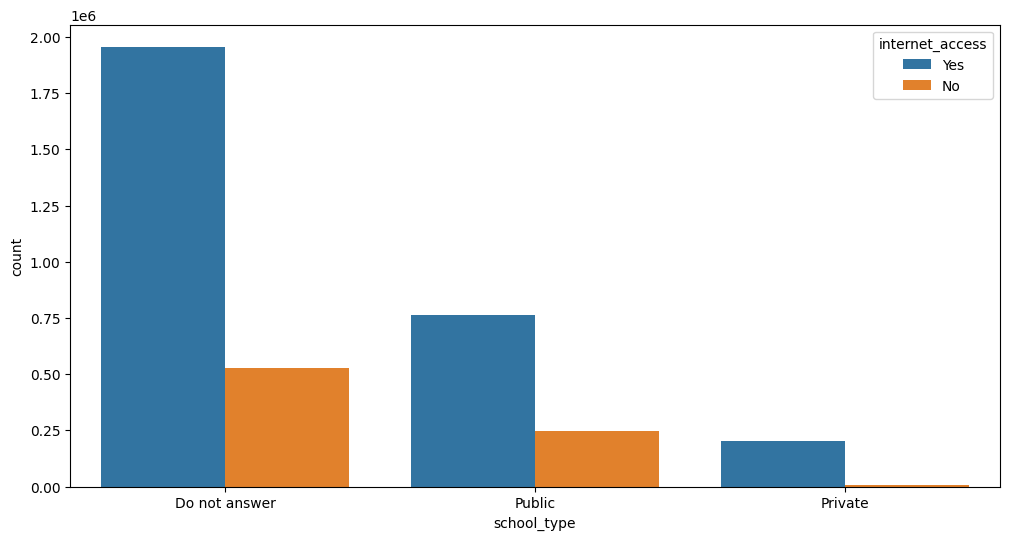

In [27]:
qualitative_analysis("school_type", "internet_access", df_enem)

## 5.3) Access to Internet & Household Income

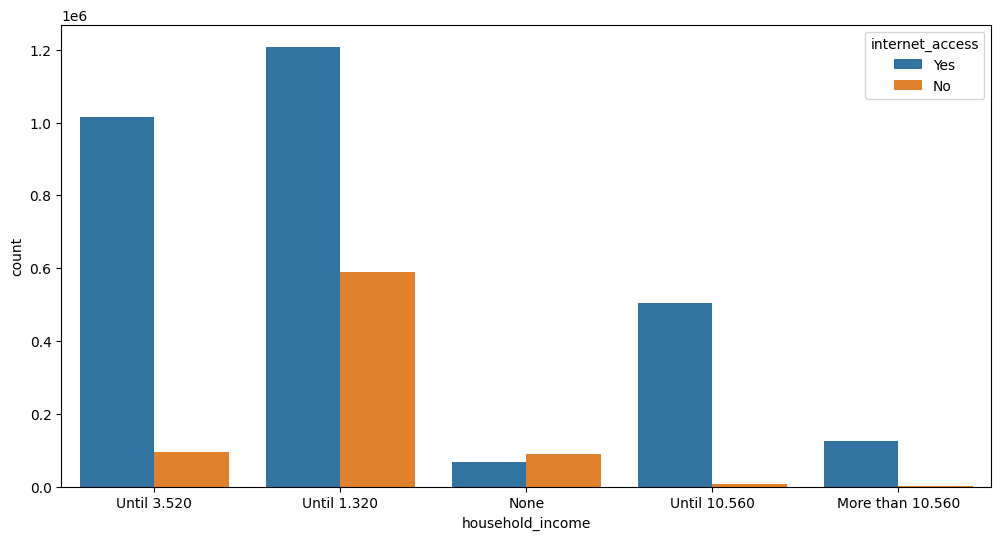

In [28]:
qualitative_analysis("household_income", "internet_access", df_enem)

## 5.4) Mothers Schooling and Household Income

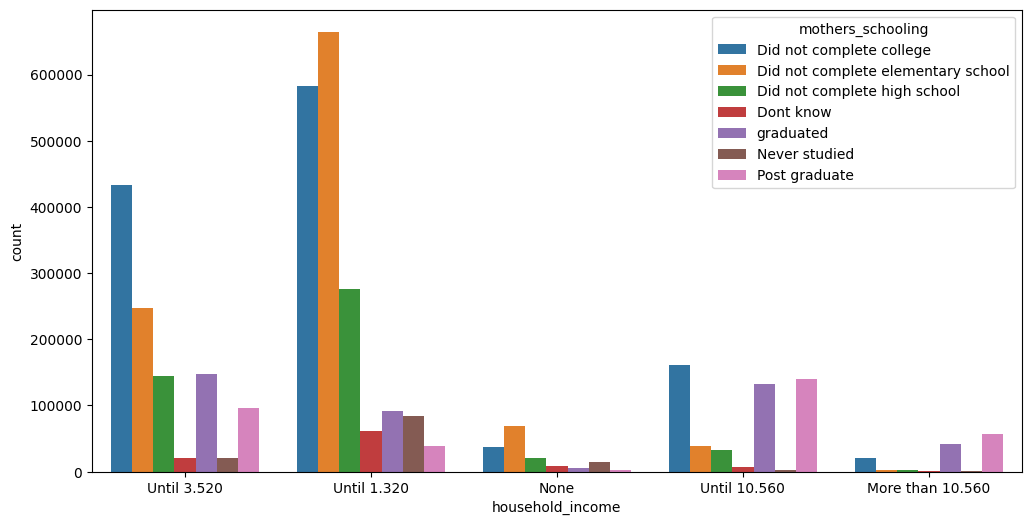

In [29]:
qualitative_analysis("household_income", "mothers_schooling", df_enem)

## 5.5) Geographic State and Household Income

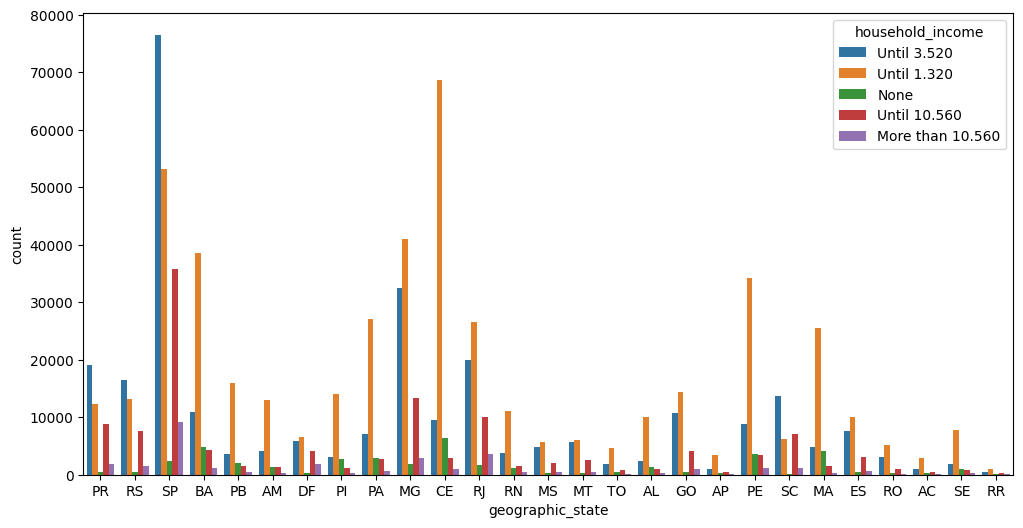

In [30]:
qualitative_analysis("geographic_state", "household_income", df_enem)

## 5.6) Type of School and Household Income

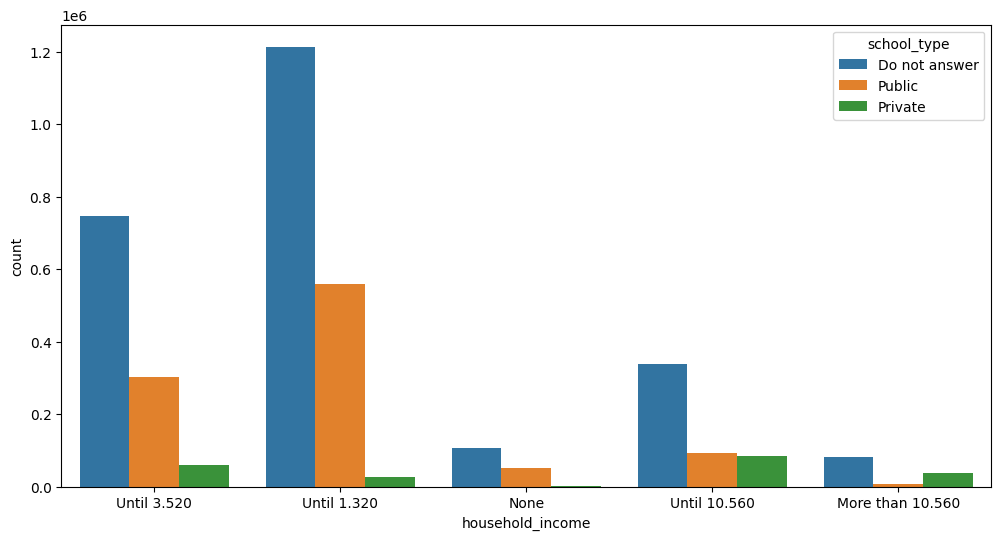

In [31]:
qualitative_analysis("household_income", "school_type", df_enem)

## 5.7) Ethnicity and Household Income

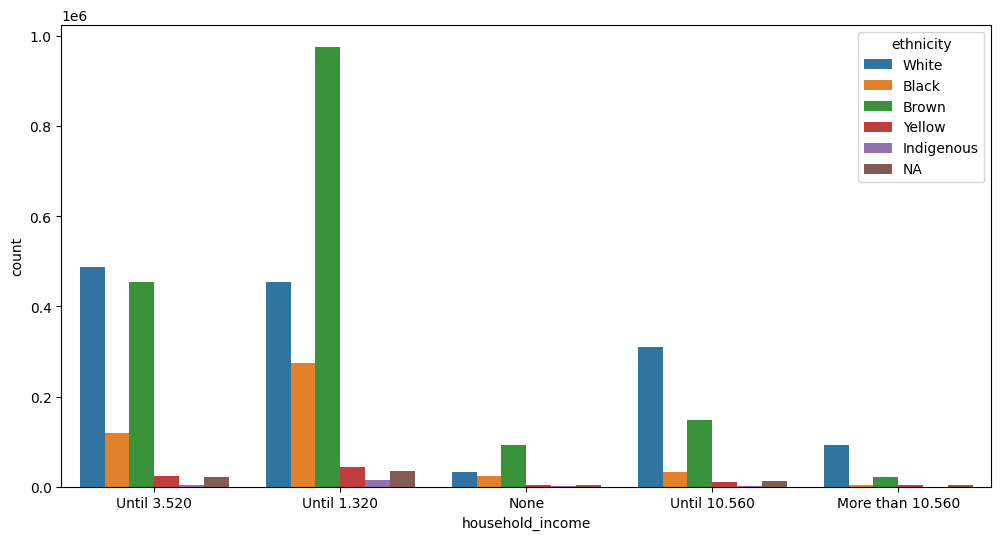

In [32]:
qualitative_analysis("household_income", "ethnicity", df_enem)

## 5.7) Ethnicity and Math Grade

,ethnicity,mean,median,std,min,max,sum,count
0,Black,550.603559,560.0,174.669829,0.0,1000.0,249540140.0,453212
1,Brown,559.687199,560.0,181.591645,0.0,1000.0,948172240.0,1694111
2,Indigenous,499.717511,520.0,189.596420,0.0,980.0,10755420.0,21523
3,NA,576.638024,580.0,194.998456,0.0,1000.0,42344260.0,73433
4,White,615.723656,600.0,179.416700,0.0,1000.0,846546140.0,1374880
5,Yellow,576.814159,580.0,182.155258,0.0,1000.0,48885000.0,84750


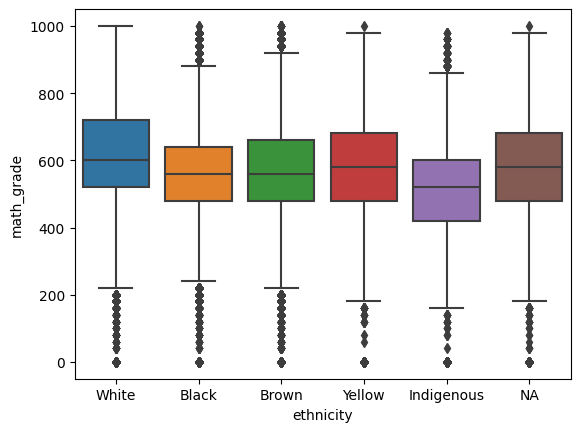

In [33]:
statistics ("ethnicity", "math_grade", df_enem)

## 5.8) Household Income and Math Grade

,household_income,mean,median,std,min,max,sum,count
0,More than 10.560,736.457725,740.0,156.590352,0.0,1000.0,91806820.0,124660
1,None,501.986489,520.0,182.326290,0.0,1000.0,79358040.0,158088
2,Until 1.320,537.869216,560.0,176.113709,0.0,1000.0,966712880.0,1797301
3,Until 10.560,675.588889,660.0,168.842018,0.0,1000.0,346261600.0,512533
4,Until 3.520,596.851839,600.0,171.012524,0.0,1000.0,662103860.0,1109327


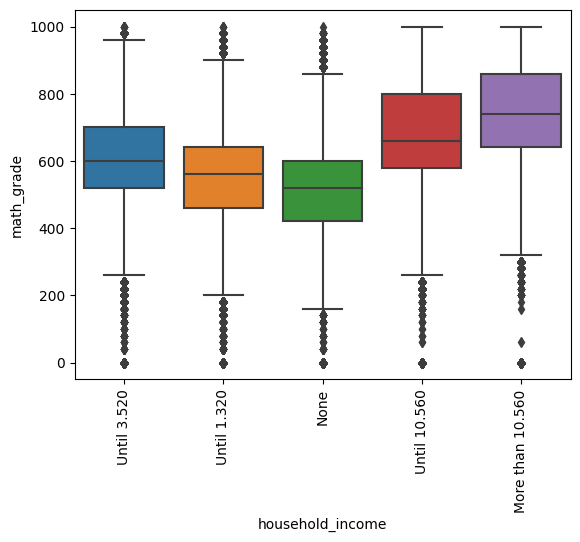

In [34]:
plt.xticks(rotation=90)
statistics ("household_income", "math_grade", df_enem)

## 5.9) Mothers Schooling and Math Grade

,mothers_schooling,mean,median,std,min,max,sum,count
0,Did not complete college,591.132044,600.0,174.828771,0.0,1000.0,729899700.0,1234749
1,Did not complete elementary school,532.067545,560.0,173.104588,0.0,1000.0,544475360.0,1023320
2,Did not complete high school,558.915688,560.0,174.434162,0.0,1000.0,265913640.0,475767
3,Dont know,505.261185,540.0,192.199499,0.0,980.0,49329660.0,97632
4,Never studied,482.739450,520.0,181.017006,0.0,1000.0,58419680.0,121017
5,Post graduate,676.235007,680.0,175.468813,0.0,1000.0,225286340.0,333148
6,graduated,655.619877,640.0,174.884550,0.0,1000.0,272918820.0,416276


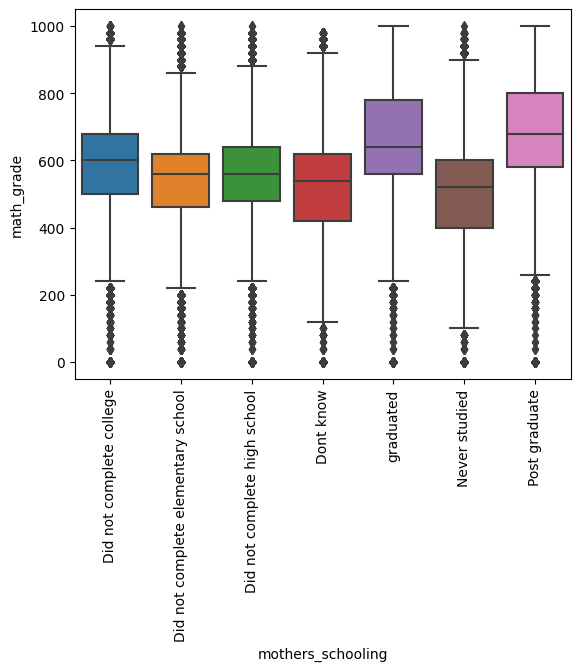

In [35]:
plt.xticks(rotation=90)
statistics ("mothers_schooling", "math_grade", df_enem)

## 5.10) Geographic State and Math Grade

,geographic_state,mean,median,std,min,max,sum,count
0,AC,569.555168,580.0,182.655137,0.0,980.0,2611980.0,4586
1,AL,562.321094,580.0,203.633614,0.0,980.0,8392080.0,14924
2,AM,520.937221,540.0,186.414282,0.0,980.0,10505220.0,20166
3,AP,549.634896,560.0,187.995131,0.0,980.0,2860300.0,5204
4,BA,569.287621,580.0,190.376896,0.0,980.0,33907340.0,59561
5,CE,535.486640,560.0,228.571249,0.0,1000.0,47277580.0,88289
6,DF,613.375830,600.0,163.625236,0.0,980.0,11450500.0,18668
7,ES,611.571698,620.0,187.461313,0.0,980.0,13319420.0,21779
8,GO,603.558950,600.0,188.173507,0.0,1000.0,18413980.0,30509
9,MA,533.697126,560.0,192.892337,0.0,980.0,19443120.0,36431


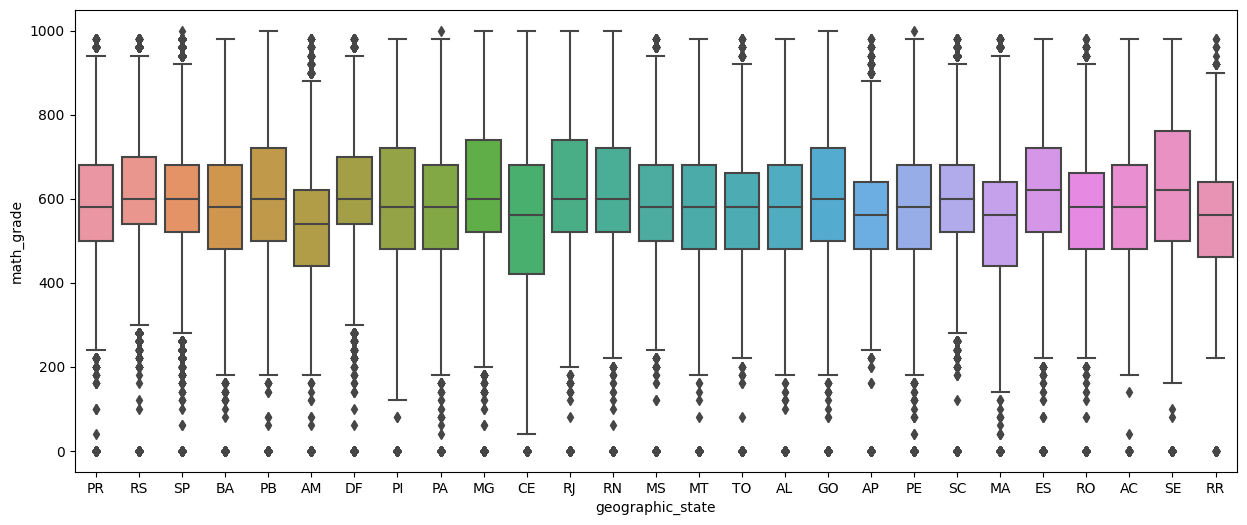

In [36]:
plt.figure(figsize=(15, 6))
statistics ("geographic_state", "math_grade", df_enem)

## 5.11) Internet Access and Math Grade

,school_type,mean,median,std,min,max,sum,count
0,Do not answer,577.907073,580.0,178.552888,0.0,1000.0,1.435977e+09,2484788
1,Private,724.857089,740.0,156.853350,0.0,1000.0,1.502607e+08,207297
2,Public,554.557963,580.0,183.439247,0.0,1000.0,5.600059e+08,1009824


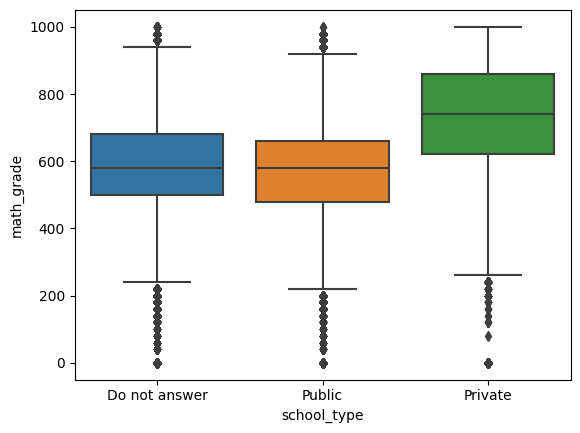

In [37]:
statistics ("school_type", "math_grade", df_enem)

# 6) The outliers: best and worst grades

In [38]:
best_grade = df_enem[df_enem['math_grade']>df_enem['math_grade'].mean()+df_enem['math_grade'].std()]
worst_grade = df_enem[df_enem['math_grade']>df_enem['math_grade'].mean()-df_enem['math_grade'].std()]

In [39]:
print(str(len(best_grade)) + ' students achieve grade over than '+str(round(df_enem['math_grade'].mean()+df_enem['math_grade'].std(),2)) +' points')
print(str(len(worst_grade)) + ' students achieve grade lower than '+str(round(df_enem['math_grade'].mean()-df_enem['math_grade'].std(),2)) +' points')


512720 students achieve grade over than 762.28 points
3261584 students achieve grade lower than 397.25 points


## 6.1) Ethnicity

BEST GRADES


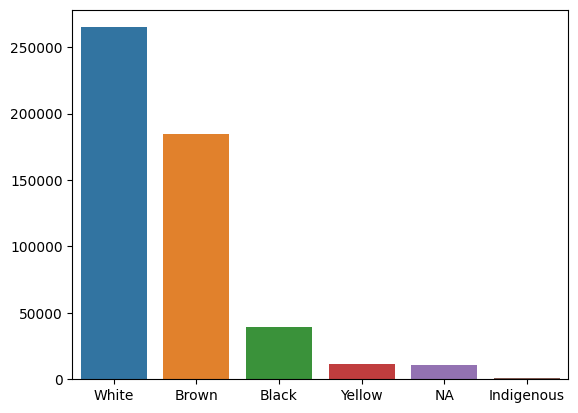

White         51.68
Brown         35.98
Black          7.74
Yellow         2.23
NA             2.14
Indigenous     0.23
Name: ethnicity, dtype: float64


In [40]:
print("BEST GRADES")
categorical_analysis(best_grade['ethnicity'])

WORST GRADES


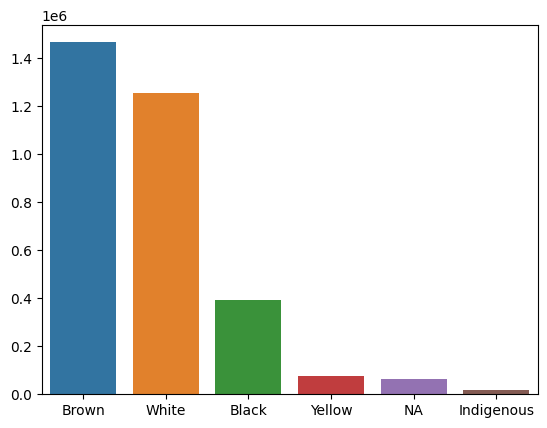

Brown         44.88
White         38.39
Black         11.98
Yellow         2.28
NA             1.95
Indigenous     0.52
Name: ethnicity, dtype: float64


In [41]:
print("WORST GRADES")
categorical_analysis(worst_grade['ethnicity'])

## 6.2) Gender

BEST GRADES


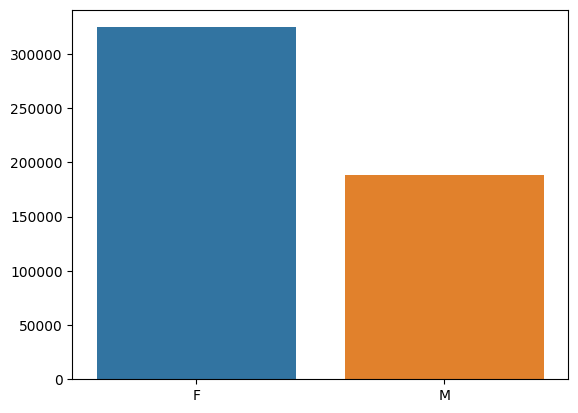

F    63.33
M    36.67
Name: gender, dtype: float64


In [42]:
print("BEST GRADES")
categorical_analysis(best_grade['gender'])

WORST GRADES


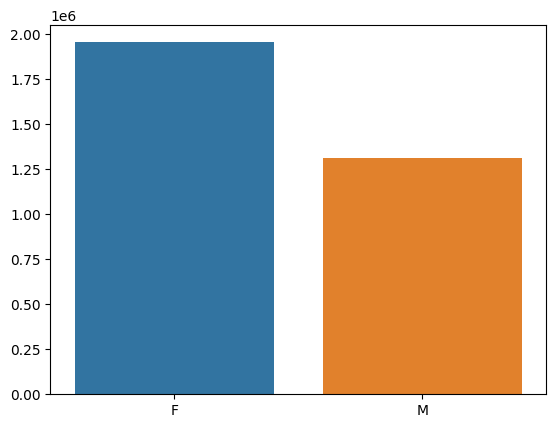

F    59.83
M    40.17
Name: gender, dtype: float64


In [43]:
print("WORST GRADES")
categorical_analysis(worst_grade['gender'])

## 6.3) Household Income

BEST GRADES


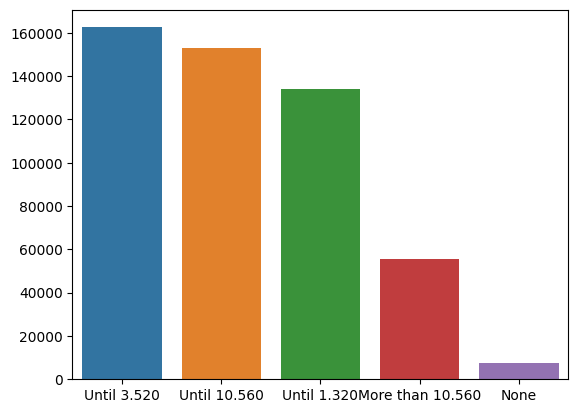

Until 3.520         31.70
Until 10.560        29.83
Until 1.320         26.10
More than 10.560    10.86
None                 1.51
Name: household_income, dtype: float64


In [44]:
print("BEST GRADES")
categorical_analysis(best_grade['household_income'])

WORST GRADES


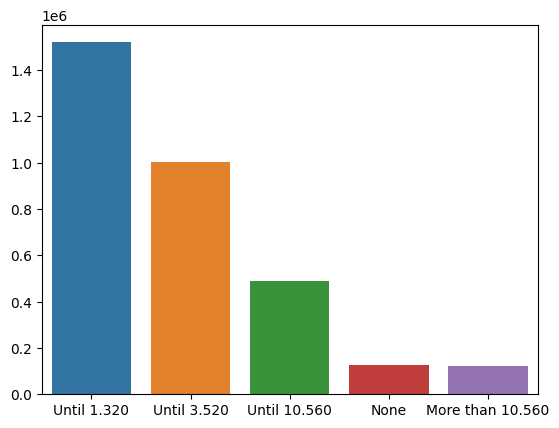

Until 1.320         46.62
Until 3.520         30.81
Until 10.560        14.98
None                 3.86
More than 10.560     3.73
Name: household_income, dtype: float64


In [45]:
print("WORST GRADES")
categorical_analysis(worst_grade['household_income'])

## 6.4) Internet Access

BEST GRADES


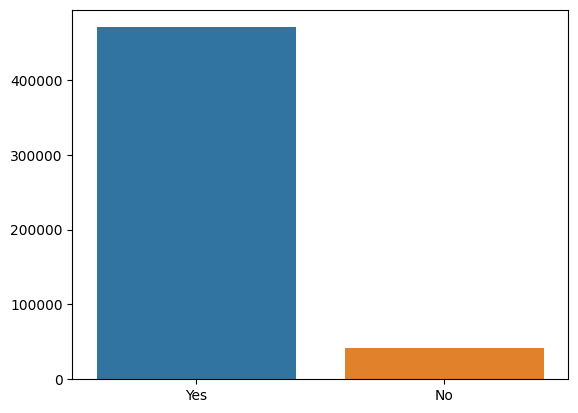

Yes    91.74
No      8.26
Name: internet_access, dtype: float64


In [46]:
print("BEST GRADES")
categorical_analysis(best_grade['internet_access'])

WORST GRADES


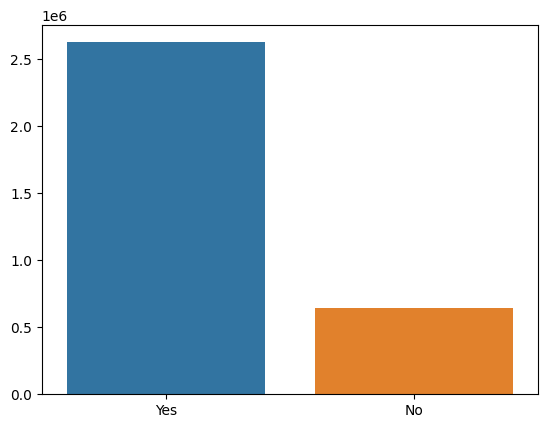

Yes    80.39
No     19.61
Name: internet_access, dtype: float64


In [47]:
print("WORST GRADES")
categorical_analysis(worst_grade['internet_access'])